In [54]:
import pandas as pd
df = pd.read_json('./logins.json')

In [55]:
df.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [56]:
df.set_index(df.login_time, inplace=True)

In [57]:
df['count'] = 1

In [58]:
df.head(5)

,login_time,count
login_time,,
1970-01-01 20:13:18,1970-01-01 20:13:18,1
1970-01-01 20:16:10,1970-01-01 20:16:10,1
1970-01-01 20:16:37,1970-01-01 20:16:37,1
1970-01-01 20:16:36,1970-01-01 20:16:36,1
1970-01-01 20:26:21,1970-01-01 20:26:21,1


In [59]:
df_15 = df.resample('15T').sum()
df_15.head(5)

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [60]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9381 non-null float64
dtypes: float64(1)
memory usage: 152.9 KB


In [61]:
df_15 = df_15.fillna(0)

In [62]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null float64
dtypes: float64(1)
memory usage: 152.9 KB


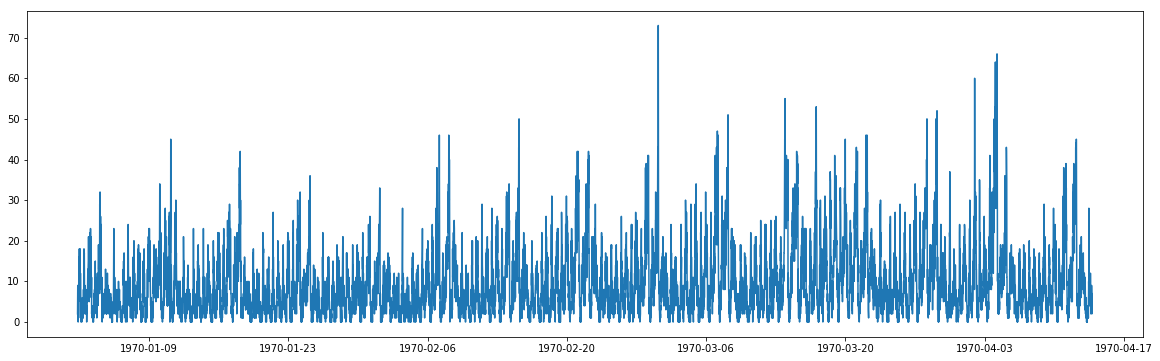

In [63]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(20,6))
plt.plot(df_15)
plt.show()

In [64]:
#zoom in to check one month
jan_df = df['1970-01-01': '1970-01-31']
feb_df = df['1970-02-01': '1970-02-28']
mar_df = df['1970-03-01': '1970-03-31']
apr_df = df['1970-04-01': ]

In [69]:

month_list = [jan_df, feb_df, mar_df, apr_df]
for month_df in month_list:
    month_df['weekday'] = month_df['login_time'].map(lambda x: x.weekday())
    
jan_df.head(5)

/Users/allenliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,login_time,count,weekday
login_time,,,
1970-01-01 20:13:18,1970-01-01 20:13:18,1,3
1970-01-01 20:16:10,1970-01-01 20:16:10,1,3
1970-01-01 20:16:37,1970-01-01 20:16:37,1,3
1970-01-01 20:16:36,1970-01-01 20:16:36,1,3
1970-01-01 20:26:21,1970-01-01 20:26:21,1,3


In [77]:
def plot_data(df):
    for day in df['weekday'].unique():
        tmp = df[df['weekday'] == day]
        tmp.drop('weekday', axis=1, inplace=True)
        tmp['count'] = 1
        tmp = tmp.resample('15T').sum()
        if day in [0,1,2,3,4]:
            plt.plot(tmp)
        else:
            plt.plot(tmp, color='black')
    plt.show()

/Users/allenliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/allenliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


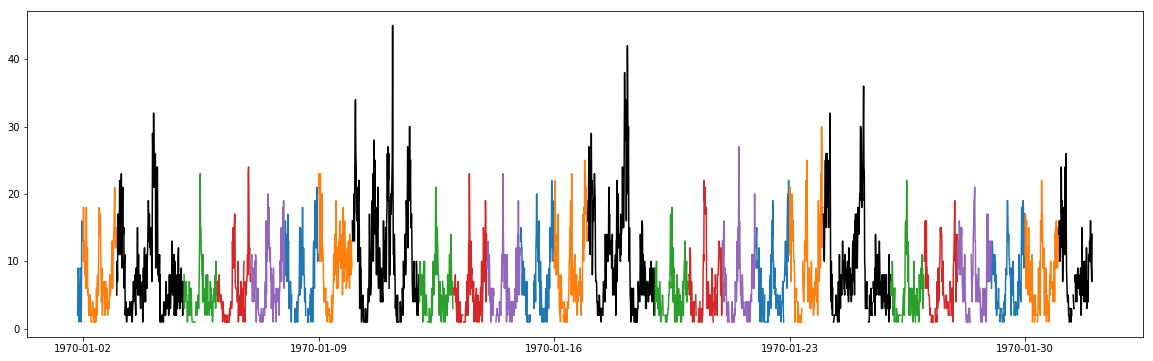

In [78]:
figure(figsize=(20,6))
plot_data(jan_df)

/Users/allenliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/allenliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


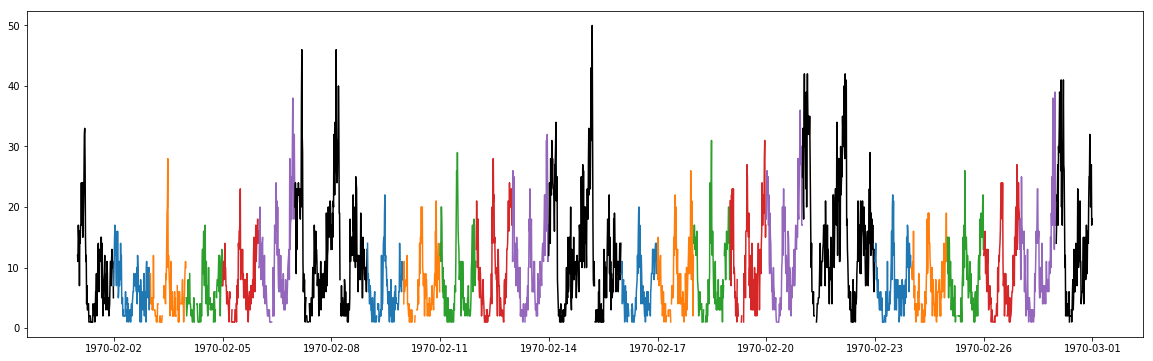

In [80]:
figure(figsize=(20,6))
plot_data(feb_df)

/Users/allenliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/allenliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


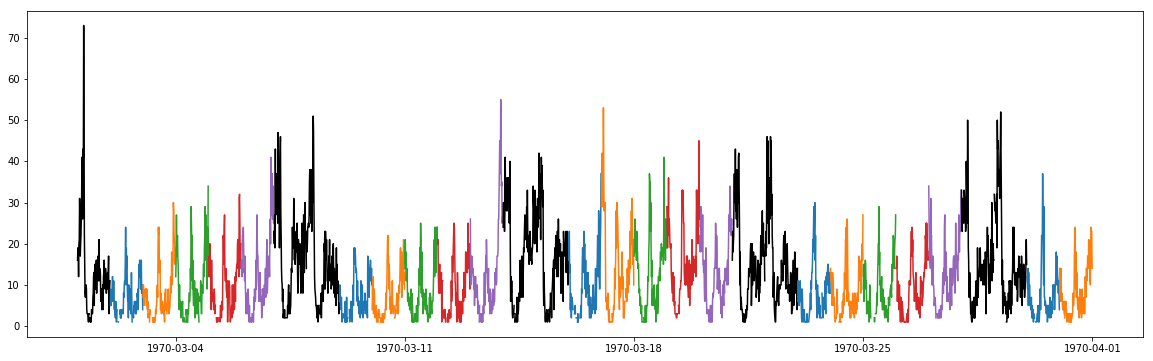

In [81]:
figure(figsize=(20,6))
plot_data(mar_df)

/Users/allenliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/allenliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


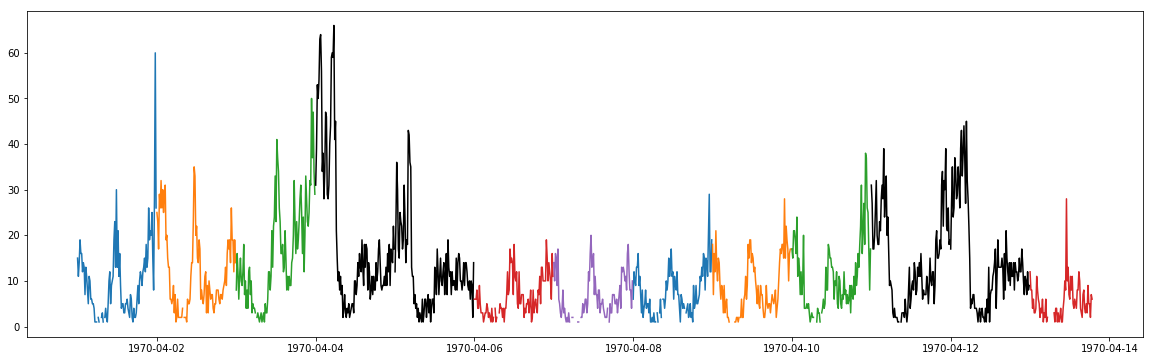

In [82]:
figure(figsize=(20,6))
plot_data(apr_df)

### As shown in the plot above, the login rate has weekly cycle. The lowest is Monday with increasing trend.

## Part 2 ‐ Experiment and metrics design

### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The % of time the driver spend in each city
It determins whether driver has changed the time spend from 100% to 50%

### 2. We may find that we incentivised too well. For example, if we are 95% confident that the mean percent of time the average Gotham driver spends driving in Gotham has dropped to 35% give or take 5%, we could see that the metric for Metropolis drivers has not moved meaningfully. In this case, we should incentivize differently since it may not always be a good thing that the metrics have move in a statistically significant way.

## Part 3 ‐ Predictive modeling

In [90]:
import json

with open('./ultimate_data_challenge.json') as f:
    data = json.load(f)
    df_part3 = pd.DataFrame(data)


In [91]:
df_part3.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [92]:
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [95]:
#convert object to date time
df_part3['last_trip_date'] = pd.to_datetime(df_part3['last_trip_date'])
df_part3['signup_date'] = pd.to_datetime(df_part3['signup_date'])

In [96]:
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [97]:
df_part3.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


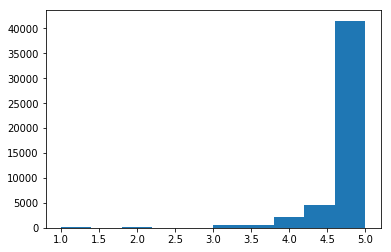

In [103]:
# plot column with missing data
# plt.hist(df_part3[df_part3['avg_rating_by_driver'].notnull()]['avg_rating_by_driver'])
import numpy as np
plt.hist(df_part3[np.logical_not(df_part3['avg_rating_by_driver'].isnull())]['avg_rating_by_driver'])
plt.show()

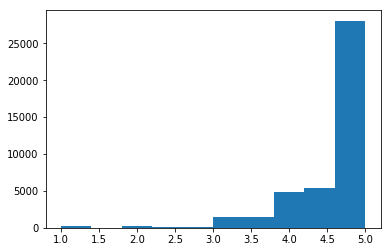

In [104]:
plt.hist(df_part3[np.logical_not(df_part3['avg_rating_of_driver'].isnull())]['avg_rating_of_driver'])
plt.show()

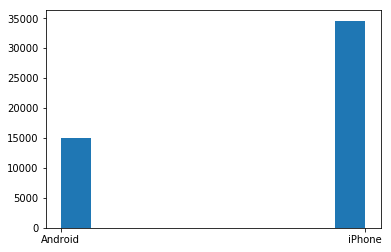

In [105]:
plt.hist(df_part3[np.logical_not(df_part3['phone'].isnull())]['phone'])
plt.show()

In [112]:
# fill the null data using the mean value
df_part3['avg_rating_by_driver'].fillna(df_part3['avg_rating_by_driver'].mean(), inplace= True)
df_part3['avg_rating_of_driver'].fillna(df_part3['avg_rating_of_driver'].mean(), inplace= True)
df_part3['phone'].fillna('iPhone', inplace=True)
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


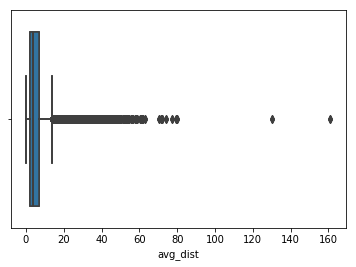

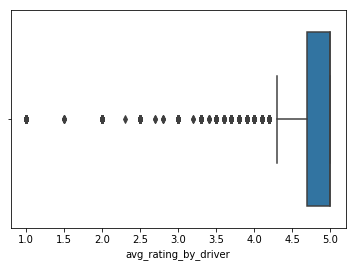

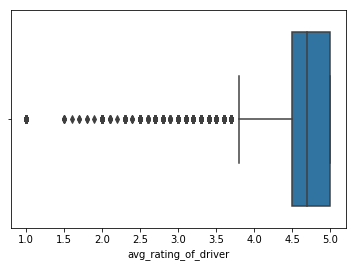

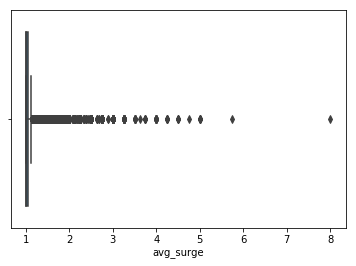

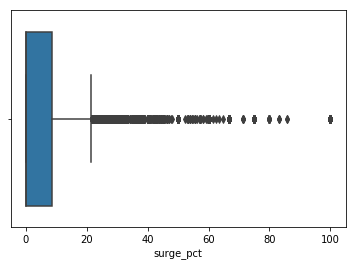

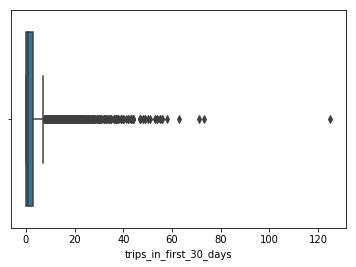

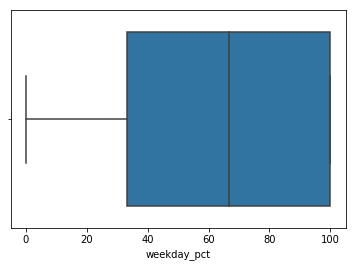

In [115]:
#check for outliner using box plot
features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct' ]
import seaborn as sns

for feature in features:
    sns.boxplot(df_part3[feature])
    plt.show()


In [121]:
# except weekday pct, all numerical feature has outlinear
# so use the data within 3 std from mean
for feature in features:
    df_part3 = df_part3[df_part3[feature] <= df_part3[feature].mean() + 3 * df_part3[feature].std()]



In [122]:
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45303 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  45303 non-null float64
avg_rating_by_driver      45303 non-null float64
avg_rating_of_driver      45303 non-null float64
avg_surge                 45303 non-null float64
city                      45303 non-null object
last_trip_date            45303 non-null datetime64[ns]
phone                     45303 non-null object
signup_date               45303 non-null datetime64[ns]
surge_pct                 45303 non-null float64
trips_in_first_30_days    45303 non-null int64
ultimate_black_user       45303 non-null bool
weekday_pct               45303 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


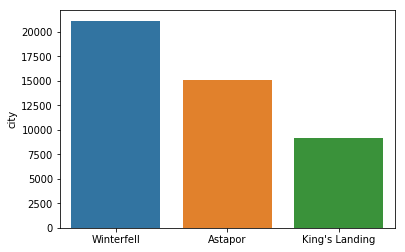

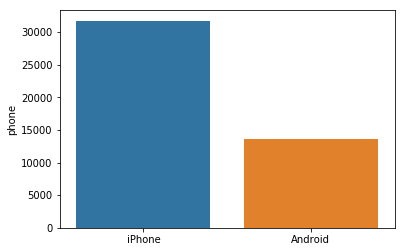

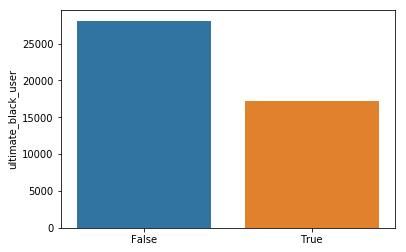

In [128]:
features_str = ['city','phone', 'ultimate_black_user']
for feature in features_str:
    sns.barplot(df_part3[feature].value_counts().index, df_part3[feature].value_counts())
    plt.show()


In [131]:
#string data looks good
# check the correlation of data
corr_matrix = df_part3.corr()
corr_matrix

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,1.000000,0.078243,0.027883,-0.108491,-0.124783,-0.140234,0.025660,0.093392
avg_rating_by_driver,0.078243,1.000000,0.100968,0.002386,0.008964,-0.033811,0.014472,0.022001
avg_rating_of_driver,0.027883,0.100968,1.000000,-0.015667,0.000698,-0.024266,-0.001279,0.011353
avg_surge,-0.108491,0.002386,-0.015667,1.000000,0.847897,0.140908,-0.017548,-0.089970
surge_pct,-0.124783,0.008964,0.000698,0.847897,1.000000,0.141308,-0.033763,-0.102269
trips_in_first_30_days,-0.140234,-0.033811,-0.024266,0.140908,0.141308,1.000000,0.085631,0.030860
ultimate_black_user,0.025660,0.014472,-0.001279,-0.017548,-0.033763,0.085631,1.000000,0.017543
weekday_pct,0.093392,0.022001,0.011353,-0.089970,-0.102269,0.030860,0.017543,1.000000


In [134]:
# check the correlation value that's > 0.5 and < 1
corr_matrix = corr_matrix[(np.abs(corr_matrix) >= 0.5) & (np.abs(corr_matrix) < 1)]

In [135]:
corr_matrix

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
avg_dist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_by_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_of_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_surge,NaN,NaN,NaN,NaN,0.847897,NaN,NaN,NaN
surge_pct,NaN,NaN,NaN,0.847897,NaN,NaN,NaN,NaN
trips_in_first_30_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ultimate_black_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# avg_surge and surge_pct are highly correlated and may not need both. But since there are not that many features, will keep it for now

# check the date when the data was pulled
sorted(df_part3['last_trip_date'].unique())[-10:]

[numpy.datetime64('2014-06-22T00:00:00.000000000'),
 numpy.datetime64('2014-06-23T00:00:00.000000000'),
 numpy.datetime64('2014-06-24T00:00:00.000000000'),
 numpy.datetime64('2014-06-25T00:00:00.000000000'),
 numpy.datetime64('2014-06-26T00:00:00.000000000'),
 numpy.datetime64('2014-06-27T00:00:00.000000000'),
 numpy.datetime64('2014-06-28T00:00:00.000000000'),
 numpy.datetime64('2014-06-29T00:00:00.000000000'),
 numpy.datetime64('2014-06-30T00:00:00.000000000'),
 numpy.datetime64('2014-07-01T00:00:00.000000000')]

In [144]:
# the data was pulled on july 1. So, users with last trip date > june 1 are retained
fraction = len(df_part3[df_part3['last_trip_date'] >= '2014-06-01']) / len(df_part3)
print('{:.2f}% of users users are retained'.format(fraction * 100))

38.23% of users users are retained


### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [149]:
# use decision tree model for prediction as we have known groups in the training data
# create target data
df_part3['retained'] = np.nan
df_part3.loc[df_part3['last_trip_date'] >='2014-06-01', 'retained'] =1
df_part3.loc[df_part3['last_trip_date'] <'2014-06-01', 'retained'] =0
df_part3.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


In [167]:
#drop last trip date column since we dont need it
df_part3.drop('last_trip_date', axis=1, inplace=True)
# drop date time column and one hot encode the catagorical column
df_part3.drop('signup_date', axis=1, inplace=True)


In [156]:
df_part3_encoded = pd.get_dummies(df_part3, columns=['city','phone','ultimate_black_user'])

In [169]:
df_part3_encoded.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1.0,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0.0,0,0,1,1,0,1,0


In [170]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
train, test = train_test_split(df_part3_encoded, test_size=.30, random_state=42, stratify=df_part3_encoded['retained'])

In [173]:
train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
27624,1.57,4.7,5.000000,1.15,13.3,6,63.3,0.0,0,0,1,1,0,1,0
34603,0.00,5.0,4.601559,1.00,0.0,1,0.0,0.0,1,0,0,1,0,1,0
17889,5.50,5.0,5.000000,1.00,0.0,0,66.7,0.0,1,0,0,0,1,1,0
38914,3.19,4.9,5.000000,1.03,6.0,10,48.0,1.0,0,1,0,0,1,0,1
41845,2.98,4.1,4.800000,1.04,6.7,0,73.3,0.0,1,0,0,0,1,1,0


In [174]:
test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
27681,1.54,4.9,4.500000,1.02,10.0,1,20.0,1.0,0,1,0,0,1,1,0
47356,2.54,4.5,4.900000,1.13,15.2,9,71.7,1.0,0,1,0,1,0,0,1
46978,1.92,5.0,5.000000,1.00,0.0,2,0.0,0.0,1,0,0,1,0,1,0
20212,8.47,4.5,4.601559,1.00,0.0,0,0.0,1.0,0,0,1,1,0,1,0
45532,7.03,5.0,4.000000,1.00,0.0,2,100.0,0.0,1,0,0,0,1,0,1


In [175]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [176]:
train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,1.57,4.7,5.000000,1.15,13.3,6,63.3,0.0,0,0,1,1,0,1,0
1,0.00,5.0,4.601559,1.00,0.0,1,0.0,0.0,1,0,0,1,0,1,0
2,5.50,5.0,5.000000,1.00,0.0,0,66.7,0.0,1,0,0,0,1,1,0
3,3.19,4.9,5.000000,1.03,6.0,10,48.0,1.0,0,1,0,0,1,0,1
4,2.98,4.1,4.800000,1.04,6.7,0,73.3,0.0,1,0,0,0,1,1,0


In [177]:
target = train['retained']
train.drop('retained', axis=1, inplace=True)

/Users/allenliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [178]:
target.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: retained, dtype: float64

In [180]:
max_depth = [2, 3, 4, 5, 6, 7, 8]
param_grid = {'max_depth': max_depth}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid_search.fit(train, target)
print(grid_search.best_params_)

{'max_depth': 7}


In [181]:
clf = DecisionTreeClassifier(max_depth=7).fit(train, target)
train_score = clf.score(train, target)

print("train score {}".format(train_score))

test_target = test['retained']
test = test.drop('retained', axis=1)
test_score = clf.score(test, test_target)
print("test score {}".format(test_score))
test_preds = final_clf.predict(test)


train score 0.7753847124117054


In [182]:
feature_importance = pd.DataFrame(clf.feature_importances_).T
feature_importance.columns = list(train.columns)
feature_importance

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0.009739,0.175585,0.003535,0.010232,0.387655,0.039522,0.055619,0.021353,0.140485,0.010413,0.047674,0.040332,0.041951,0.015906


### Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

To impove the longterm rider retention, the company should pay more attention to surge_pct which has the most effect according to the model